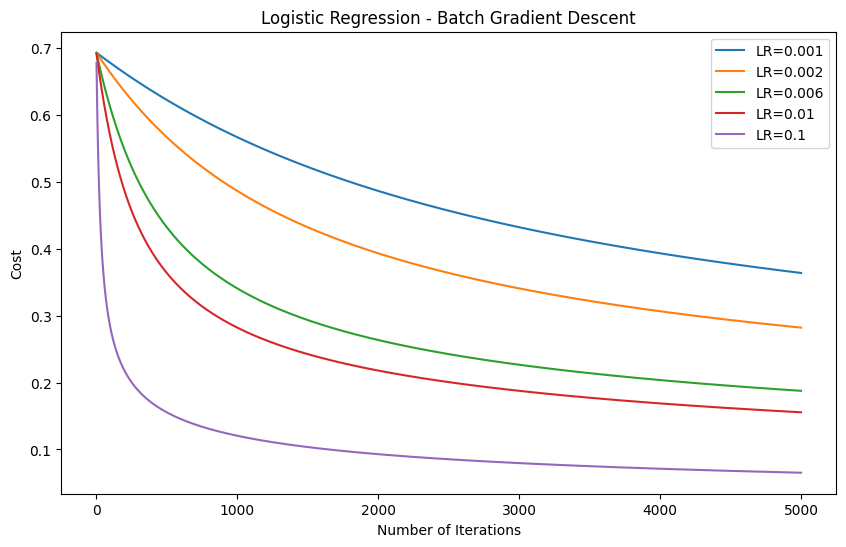

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

# The below is the method to normalize the features
# defining the function "normalizeTheFeatures"
def normalizeTheFeatures(X):
    #calculating the mean and the standard deviation
    m = np.mean(X, axis=0)
    sd = np.std(X, axis=0)
    #Normalizing the features
    y = (X - m) / sd
    return y

#the Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def computeCost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    #calculating the cost of the logistic regression
    c = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return c

# Gradient Descent
def gradientDescent(X, y, theta, learningRate, iterations):
    m = len(y)
    cHistory = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        g = np.dot(X.T, (h - y)) / m
        #Updating the theta using the gradient and learning rate
        theta -= learningRate * g

        c= computeCost(X, y, theta)
        cHistory.append(c)

    return theta, cHistory

# Loading our given data
d = np.loadtxt('/content/project3_train.csv', delimiter=',', skiprows=1)
X = d[:, :-1]
y = d[:, -1]

# Normalizing the  features
XNormalized = normalizeTheFeatures(X)

# Add intercept term to the data
XNormalized = np.c_[np.ones(XNormalized.shape[0]), XNormalized]

# set the parameters
iterations = 5000
learning_rates = [0.001, 0.002, 0.006, 0.01, 0.1]

# Plot for the data
plt.figure(figsize=(10, 6))

#Iterating through the different learning rates
for l in learning_rates:
    #Initializing theta with zeros
    thetaInitial = np.zeros(XNormalized.shape[1])
    #Run gradient descent
    theta, cost_history = gradientDescent(XNormalized, y, thetaInitial, l, iterations)
    #plotting the cost history for each learning rate updated above
    plt.plot(range(1, iterations+1), cost_history, label=f'LR={l}')

plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Logistic Regression - Batch Gradient Descent')
plt.legend()
plt.savefig('q1_plot.png')
plt.show()


In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import time

# Loading our data
def loadTheDataset(file):
    # Loading data from a CSV file into the NumPy array
    d = []
    with open(file, 'r') as csvfile:
        r = csv.reader(csvfile)
        for i in r:
            d.append([float(i[0]), float(i[1]), float(i[2]), int(i[3])])
    return np.array(d)

# Define the logistic function
def sigmoidFunc(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression with gradient descent and L2 regularization
def logisticRegression(d, lr, numIterations, gradientDescentType, lambdaReg=0.1):
    #Extracting the features (X) and labels (Y) from the given dataset
    X = d[:, :-1]
    y = d[:, -1]
    m, n = X.shape
    # Adding the bias term to the feature matrix
    X = np.c_[np.ones((m, 1)), X]
    #Initializing the theta to zeros
    theta = np.zeros(n + 1)
    loss_history = []

    # Recording the start time for measuring the execution time
    sTime = time.time()

    #performing the gradient descent for the specified number of the iterations
    for iteration in range(numIterations):
        if gradientDescentType == 'SGD':
           # SGD refers to Stochastic Gradient Descent: Randomly selecting one data point for each of the iteration
            rIdx = np.random.randint(0, m)
            xi, yi = X[rIdx], y[rIdx]
        elif gradientDescentType == 'MBGD':
            #MBSD refers to  Mini-Batch Gradient Descent: Randomly selecting a mini-batch of data points
            Bindices = np.random.choice(m, size=5, replace=False)
            xi, yi = X[Bindices], y[Bindices]
        elif gradient_descent_type == 'BGD':
            #BGD refers to Batch Gradient Descent: Use the entire dataset for each iteration
            xi, yi = X, y

# Calculating the sigmoid of the linear combination of features and parameters
        z = np.dot(xi, theta)
        h = sigmoid(z)

        # Add L2 regularization term to cost
        regularization_term = (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)
        cost = -np.mean(y * np.log(sigmoid(np.dot(X, theta))) + (1 - y) * np.log(1 - sigmoid(np.dot(X, theta)))) + regularization_term
        loss_history.append(cost)

        # Update theta with the regularization term in the gradient
        gradient = (np.dot(xi.T, (h - yi)) + lambda_reg * np.concatenate(([0], theta[1:]))) / xi.shape[0]
        theta -= lr * gradient

# Recording the end time for measuring the execution time
    eTime = time.time()
    t = eTime - sTime

    return theta, loss_history, t

# Training and test datasets
trainingData = loadTheDataset('/content/project3_train.csv')
testData = loadTheDataset('/content/project3_test.csv')

# Parameters
learningRate = 0.1
num_iterations = 300000

# Perform logistic regression with different gradient descent types and L2 regularization
gradient_descent_types = ['SGD', 'MBGD', 'BGD']
lambda_reg = 0.1  # You can experiment with different values of lambda_reg

results = []

for gradient_descent_type in gradient_descent_types:
    theta, lh, tt = logisticRegression(trainingData, learningRate, num_iterations, gradient_descent_type, lambda_reg)
    results.append((gradient_descent_type, theta, lh, tt))

# Accuracy calculation function
def calculate_accuracy(data, theta):
    X = data[:, :-1]
    y = data[:, -1]
    X = np.c_[np.ones((X.shape[0], 1)), X]
    y_pred = sigmoid(np.dot(X, theta))
    y_pred_binary = (y_pred >= 0.5).astype(int)
    accuracy = np.mean(y_pred_binary == y)
    return accuracy

# Calculate accuracy for each gradient descent type on training and test data
accuracy_results = []

for gradientDT, theta, _, _ in results:
    traina = calculate_accuracy(trainingData, theta)
    testa = calculate_accuracy(testData, theta)
    accuracy_results.append((gradientDT, traina, testa))

# Print and plot the results
for gdf, theta, loss_history, tt in results:
    print(f"\nGradient Descent Type: {gdf}")
    print("Theta (Parameters):", theta)
    print(f"Time Taken: {tt:.2f} seconds")


#It results the Output and also the plots for accuracy
for gdf, traina, testa in accuracy_results:
    print(f"\nGradient Descent Type: {gdf}")
    print(f"Training Accuracy: {traina:.2%}")
    print(f"Test Accuracy: {testa:.2%}")

<ipython-input-7-c0cb8624cdb9>:55: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y * np.log(sigmoid(np.dot(X, theta))) + (1 - y) * np.log(1 - sigmoid(np.dot(X, theta)))) + regularization_term
<ipython-input-7-c0cb8624cdb9>:55: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y * np.log(sigmoid(np.dot(X, theta))) + (1 - y) * np.log(1 - sigmoid(np.dot(X, theta)))) + regularization_term



Gradient Descent Type: SGD
Theta (Parameters): [-3.33871084  0.83070382  0.44029414  0.35615567]
Time Taken: 52.10 seconds

Gradient Descent Type: MBGD
Theta (Parameters): [-5.52037477  1.47880417  0.97462596  0.72498418]
Time Taken: 66.35 seconds

Gradient Descent Type: BGD
Theta (Parameters): [-24.89572116   6.74477987   4.1160585    3.24553695]
Time Taken: 57.50 seconds

Gradient Descent Type: SGD
Training Accuracy: 97.80%
Test Accuracy: 95.00%

Gradient Descent Type: MBGD
Training Accuracy: 99.40%
Test Accuracy: 100.00%

Gradient Descent Type: BGD
Training Accuracy: 99.90%
Test Accuracy: 100.00%
